# Libraries

In [13]:
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt
import shutil
import random
import numpy as np

from io import BytesIO
from PIL import Image

# Work on the zip file, extract and create files I want to work on

In [14]:
zip_file_path = "MINI-DDSM-Project.zip"
extracted_dir = ""

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)
    

# Counting the number of folders in the main

In [15]:
folders = [name for name in os.listdir("MINI-DDSM-Project") if os.path.isdir(os.path.join("MINI-DDSM-Project", name))]
num_folders = len(folders)
print(num_folders)

3


# Counting the total number of images in the folder

In [16]:
project_directory = "MINI-DDSM-Project"
total_jpg_count = 0
total_jpg_count_m = 0

for root, dirs, files in os.walk(project_directory):
    jpg_count = sum(1 for file in files if file.lower().endswith('.jpg'))
    total_jpg_count += jpg_count

for root, dirs, files in os.walk(project_directory):
    jpg_count_m = sum(1 for file in files if file.lower().endswith('.jpg') and "_Mask" not in ("/".join(file.split("/")[-1:])))
    total_jpg_count_m += jpg_count_m

print("Total number of .jpg files in all folders:", total_jpg_count)
print("Total number of .jpg, no _Mask files in all folders:", total_jpg_count_m)


Total number of .jpg files in all folders: 10873
Total number of .jpg, no _Mask files in all folders: 7898


# Plot some samples

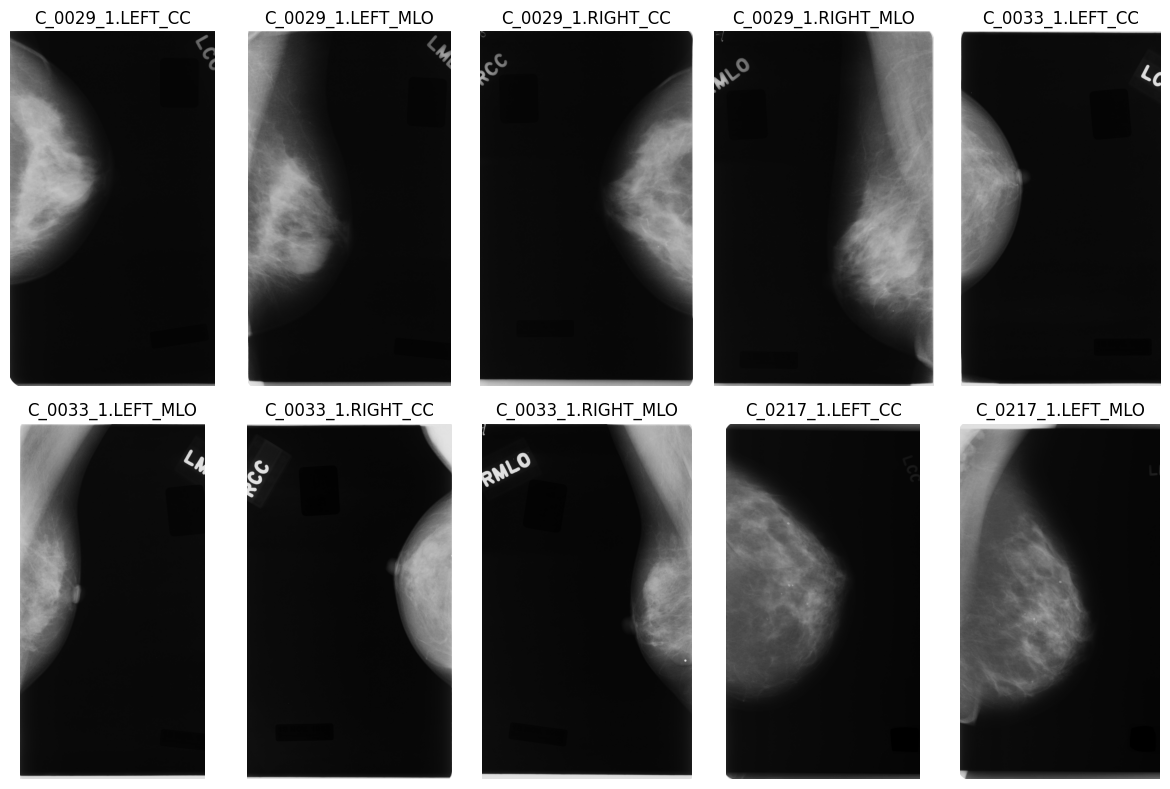

In [17]:

# Number of images to plot
num_images_to_plot = 10  # Change this to the desired number
# Number of rows and columns for subplots
num_rows = 2
num_cols = int(num_images_to_plot/2)
# Open the zip file
with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
    plt.figure(figsize=(12, 8))
    
    plotted_images = 0
    
    for filename in zip_ref.namelist():
        label = ("/".join(filename.split("/")[-1:]))
        # Display JPG images with file names up to the specified number
        if filename.lower().endswith(".jpg") and plotted_images < num_images_to_plot and "_Mask" not in label:
            with zip_ref.open(filename) as file:
                image_bytes = file.read()  # Read image bytes from the zip file
                img = Image.open(BytesIO(image_bytes))  # Open the image using PIL
                plt.subplot(num_rows, num_cols, plotted_images + 1)
                plt.imshow(img, cmap="gray")  # Display the image
                plt.title(label.replace(".jpg",""))
                plt.axis("off")  # Turn off axis labels
                plotted_images += 1
    
    plt.tight_layout()
    plt.show()
    

# Creating folders I'll use for analysed the dataset

In [18]:
Project = os.makedirs("Project" , exist_ok=True)
Final   = os.makedirs("Final" , exist_ok=True)

# Coping imagne from subfolders the parent folders in order to avoid some permissions issues

In [19]:
base_dest_path = "Project" 
os.makedirs(os.path.join(base_dest_path, "Benign"), exist_ok=True) 
os.makedirs(os.path.join(base_dest_path, "Cancer"), exist_ok=True) 
os.makedirs(os.path.join(base_dest_path, "Normal"), exist_ok=True) 
os.makedirs(os.path.join(base_dest_path, "NoMask"), exist_ok=True) 



def copy_Normal_files(source_folder_n, destination_folder_n):
    if not os.path.exists(destination_folder_n):
        os.makedirs(destination_folder_n)##

    for root, dirs, files in os.walk(source_folder_n):
       for file in files:
            #label = ("/".join(file.split("/")[-1:]))
            if file.lower().endswith(".jpg"):
                source_path = os.path.join(root, file)
                destination_path = os.path.join(destination_folder_n, file)#

                try:
                    shutil.copy(source_path, destination_path)
                    print(f"Copied: {file}")
                except Exception as e:
                    print(f"Error copying {file}: {e}")

# Specify the source folder and destination folder
source_folder_n = "MINI-DDSM-Project/Normal"
destination_folder_n = "Project/Normal"

copy_Normal_files(source_folder_n, destination_folder_n)






Copied: A_0002_1.LEFT_CC.jpg
Copied: A_0002_1.LEFT_MLO.jpg
Copied: A_0002_1.RIGHT_CC.jpg
Copied: A_0002_1.RIGHT_MLO.jpg
Copied: A_0003_1.LEFT_CC.jpg
Copied: A_0003_1.LEFT_MLO.jpg
Copied: A_0003_1.RIGHT_CC.jpg
Copied: A_0003_1.RIGHT_MLO.jpg
Copied: A_0005_1.LEFT_CC.jpg
Copied: A_0005_1.LEFT_MLO.jpg
Copied: A_0005_1.RIGHT_CC.jpg
Copied: A_0005_1.RIGHT_MLO.jpg
Copied: A_0006_1.LEFT_CC.jpg
Copied: A_0006_1.LEFT_MLO.jpg
Copied: A_0006_1.RIGHT_CC.jpg
Copied: A_0006_1.RIGHT_MLO.jpg
Copied: A_0009_1.LEFT_CC.jpg
Copied: A_0009_1.LEFT_MLO.jpg
Copied: A_0009_1.RIGHT_CC.jpg
Copied: A_0009_1.RIGHT_MLO.jpg
Copied: A_0010_1.LEFT_CC.jpg
Copied: A_0010_1.LEFT_MLO.jpg
Copied: A_0010_1.RIGHT_CC.jpg
Copied: A_0010_1.RIGHT_MLO.jpg
Copied: A_0011_1.LEFT_CC.jpg
Copied: A_0011_1.LEFT_MLO.jpg
Copied: A_0011_1.RIGHT_CC.jpg
Copied: A_0011_1.RIGHT_MLO.jpg
Copied: A_0012_1.LEFT_CC.jpg
Copied: A_0012_1.LEFT_MLO.jpg
Copied: A_0012_1.RIGHT_CC.jpg
Copied: A_0012_1.RIGHT_MLO.jpg
Copied: A_0013_1.LEFT_CC.jpg
Copied: A_0

In [20]:


def copy_files_based_on_mask(source_folder, destination_folder_b, destination_folder_m):
    # Create destination folders if they don't exist
    if not os.path.exists(destination_folder_b):
        os.makedirs(destination_folder_b)
    
    if not os.path.exists(destination_folder_m):
        os.makedirs(destination_folder_m)

    mask_files = []  # List to store all the _Mask files
    all_files = []   # List to store all files

    # Populate mask_files and all_files lists
    for root, _, files in os.walk(source_folder):
        for file in files:
            file_path = os.path.join(root, file)
            if file.lower().endswith(".jpg"):
                all_files.append(file_path)
                if "_Mask" in file:
                    mask_files.append(file_path)

    # For each _Mask file, copy it and its counterpart to "Project/Benign"
    for mask_file_path in mask_files:
        non_mask_file_path = mask_file_path.replace("_Mask", "")

        # Copy the _Mask file
        if os.path.exists(mask_file_path):
            shutil.copy(mask_file_path, os.path.join(destination_folder_b, os.path.basename(mask_file_path)))
            print(f"Copied {os.path.basename(mask_file_path)} to {destination_folder_b}")
        # Copy its counterpart
        if non_mask_file_path in all_files and os.path.exists(non_mask_file_path):
            shutil.copy(non_mask_file_path, os.path.join(destination_folder_b, os.path.basename(non_mask_file_path)))
            print(f"Copied {os.path.basename(non_mask_file_path)} to {destination_folder_b}")

            # Remove the copied files from the all_files list to prevent them from being copied again
            all_files.remove(mask_file_path)
            all_files.remove(non_mask_file_path)

    # Copy the remaining files in the all_files list to "Project/Normal"
    for remaining_file_path in all_files:
        if os.path.exists(remaining_file_path):
            shutil.copy(remaining_file_path, os.path.join(destination_folder_m, os.path.basename(remaining_file_path)))
            print(f"Copied {os.path.basename(remaining_file_path)} to {destination_folder_m}")

# Specify source and destination folders
source_folder = "MINI-DDSM-Project/Benign"
destination_folder_b = "Project/Benign"
destination_folder_m = "Project/NoMask"

copy_files_based_on_mask(source_folder, destination_folder_b, destination_folder_m)


Copied C_0029_1.LEFT_CC_Mask.jpg to Project/Benign
Copied C_0029_1.LEFT_CC.jpg to Project/Benign
Copied C_0029_1.LEFT_MLO_Mask.jpg to Project/Benign
Copied C_0029_1.LEFT_MLO.jpg to Project/Benign
Copied C_0033_1.RIGHT_CC_Mask.jpg to Project/Benign
Copied C_0033_1.RIGHT_CC.jpg to Project/Benign
Copied C_0033_1.RIGHT_MLO_Mask.jpg to Project/Benign
Copied C_0033_1.RIGHT_MLO.jpg to Project/Benign
Copied C_0217_1.RIGHT_CC_Mask.jpg to Project/Benign
Copied C_0217_1.RIGHT_CC.jpg to Project/Benign
Copied C_0217_1.RIGHT_MLO_Mask.jpg to Project/Benign
Copied C_0217_1.RIGHT_MLO.jpg to Project/Benign
Copied C_0234_1.RIGHT_CC_Mask.jpg to Project/Benign
Copied C_0234_1.RIGHT_CC.jpg to Project/Benign
Copied C_0234_1.RIGHT_MLO_Mask.jpg to Project/Benign
Copied C_0234_1.RIGHT_MLO.jpg to Project/Benign
Copied C_0235_1.RIGHT_CC_Mask.jpg to Project/Benign
Copied C_0235_1.RIGHT_CC.jpg to Project/Benign
Copied C_0235_1.RIGHT_MLO_Mask.jpg to Project/Benign
Copied C_0235_1.RIGHT_MLO.jpg to Project/Benign
Copi

In [21]:

def copy_files_based_on_mask(source_folder, destination_folder_c, destination_folder_m):
    # Create destination folders if they don't exist
    if not os.path.exists(destination_folder_c):
        os.makedirs(destination_folder_c)
    
    if not os.path.exists(destination_folder_m):
        os.makedirs(destination_folder_m)

    mask_files = []  # List to store all the _Mask files
    all_files = []   # List to store all files

    # Populate mask_files and all_files lists
    for root, _, files in os.walk(source_folder):
        for file in files:
            file_path = os.path.join(root, file)
            if file.lower().endswith(".jpg"):
                all_files.append(file_path)
                if "_Mask" in file:
                    mask_files.append(file_path)

    # For each _Mask file, copy it and its counterpart to "Project/Cancer"
    for mask_file_path in mask_files:
        non_mask_file_path = mask_file_path.replace("_Mask", "")

        # Copy the _Mask file
        if os.path.exists(mask_file_path):
            shutil.copy(mask_file_path, os.path.join(destination_folder_c, os.path.basename(mask_file_path)))
            print(f"Copied {os.path.basename(mask_file_path)} to {destination_folder_c}")

        # Copy its counterpart
        if non_mask_file_path in all_files and os.path.exists(non_mask_file_path):
            shutil.copy(non_mask_file_path, os.path.join(destination_folder_c, os.path.basename(non_mask_file_path)))
            print(f"Copied {os.path.basename(non_mask_file_path)} to {destination_folder_c}")

            # Remove the copied files from the all_files list to prevent them from being copied again
            all_files.remove(mask_file_path)
            all_files.remove(non_mask_file_path)

    # Copy the remaining files in the all_files list to "Project/Normal"
    for remaining_file_path in all_files:
        if os.path.exists(remaining_file_path):
            shutil.copy(remaining_file_path, os.path.join(destination_folder_m, os.path.basename(remaining_file_path)))
            print(f"Copied {os.path.basename(remaining_file_path)} to {destination_folder_m}")

# Specify source and destination folders
source_folder = "MINI-DDSM-Project/Cancer"
destination_folder_c = "Project/Cancer"
destination_folder_m = "Project/NoMask"

copy_files_based_on_mask(source_folder, destination_folder_c, destination_folder_m)


Copied C_0001_1.RIGHT_CC_Mask.jpg to Project/Cancer
Copied C_0001_1.RIGHT_CC.jpg to Project/Cancer
Copied C_0001_1.RIGHT_MLO_Mask.jpg to Project/Cancer
Copied C_0001_1.RIGHT_MLO.jpg to Project/Cancer
Copied C_0002_1.LEFT_CC_Mask.jpg to Project/Cancer
Copied C_0002_1.LEFT_CC.jpg to Project/Cancer
Copied C_0002_1.LEFT_MLO_Mask.jpg to Project/Cancer
Copied C_0002_1.LEFT_MLO.jpg to Project/Cancer
Copied C_0003_1.RIGHT_CC_Mask.jpg to Project/Cancer
Copied C_0003_1.RIGHT_CC.jpg to Project/Cancer
Copied C_0003_1.RIGHT_MLO_Mask.jpg to Project/Cancer
Copied C_0003_1.RIGHT_MLO.jpg to Project/Cancer
Copied C_0004_1.RIGHT_CC_Mask.jpg to Project/Cancer
Copied C_0004_1.RIGHT_CC.jpg to Project/Cancer
Copied C_0004_1.RIGHT_MLO_Mask.jpg to Project/Cancer
Copied C_0004_1.RIGHT_MLO.jpg to Project/Cancer
Copied C_0005_1.RIGHT_CC_Mask.jpg to Project/Cancer
Copied C_0005_1.RIGHT_CC.jpg to Project/Cancer
Copied C_0005_1.RIGHT_MLO_Mask.jpg to Project/Cancer
Copied C_0005_1.RIGHT_MLO.jpg to Project/Cancer
Copi

In [22]:
import os

def delete_mask_files(directory):
    # Walk through the specified directory
    for root, _, files in os.walk(directory):
        for file in files:
            # Check if the file has .jpg extension and '_Mask' in its name
            if file.lower().endswith(".jpg") and "_mask" in file.lower():
                file_path = os.path.join(root, file)
                try:
                    os.remove(file_path)
                    print(f"Deleted: {file_path}")
                except Exception as e:
                    print(f"Error deleting {file_path}: {e}")

# Specify the directory where the files should be deleted
directory = "Project"
delete_mask_files(directory)


Deleted: Project\Benign\A_1123_1.LEFT_CC_Mask.jpg
Deleted: Project\Benign\A_1123_1.LEFT_MLO_Mask.jpg
Deleted: Project\Benign\A_1124_1.LEFT_CC_Mask.jpg
Deleted: Project\Benign\A_1124_1.LEFT_MLO_Mask.jpg
Deleted: Project\Benign\A_1170_1.RIGHT_CC_Mask.jpg
Deleted: Project\Benign\A_1170_1.RIGHT_MLO_Mask.jpg
Deleted: Project\Benign\A_1177_1.RIGHT_CC_Mask.jpg
Deleted: Project\Benign\A_1177_1.RIGHT_MLO_Mask.jpg
Deleted: Project\Benign\A_1242_1.LEFT_CC_Mask.jpg
Deleted: Project\Benign\A_1242_1.LEFT_MLO_Mask.jpg
Deleted: Project\Benign\A_1259_1.LEFT_CC_Mask.jpg
Deleted: Project\Benign\A_1259_1.LEFT_MLO_Mask.jpg
Deleted: Project\Benign\A_1264_1.RIGHT_CC_Mask.jpg
Deleted: Project\Benign\A_1264_1.RIGHT_MLO_Mask.jpg
Deleted: Project\Benign\A_1265_1.RIGHT_CC_Mask.jpg
Deleted: Project\Benign\A_1265_1.RIGHT_MLO_Mask.jpg
Deleted: Project\Benign\A_1266_1.LEFT_CC_Mask.jpg
Deleted: Project\Benign\A_1266_1.LEFT_MLO_Mask.jpg
Deleted: Project\Benign\A_1267_1.RIGHT_CC_Mask.jpg
Deleted: Project\Benign\A_1267_1

# Analyse each folder

In [23]:
project_directory = "Project"

total_File_count = 0
folders = [folder for folder in os.listdir(project_directory) if os.path.isdir(os.path.join(project_directory, folder))]
for root, dirs, files in os.walk(project_directory):
    File_count = sum(1 for file in files if file.lower().endswith('.jpg'))
    total_File_count += File_count
print("Total number of .jpg files in Project:", total_File_count)
print() 

for folder in folders:
    folder_path = os.path.join(project_directory, folder)
    image_files = [file for file in os.listdir(folder_path) if file.lower().endswith(('.jpg'))]
    num_images = len(image_files)
    print(f"Folder: {folder}, Number of Images: {num_images}")
    


    



Total number of .jpg files in Project: 7809

Folder: Benign, Number of Images: 1402
Folder: Cancer, Number of Images: 1428
Folder: NoMask, Number of Images: 2571
Folder: Normal, Number of Images: 2408


# Split the dataset into train, test and validation


In [27]:

# Set up paths
source_folders = ["Benign", "Cancer", "Normal"]
base_source_path = "Project"  # Replace with the path to your source folder
base_dest_path = "Final"  # Replace with the path to your destination folder

# Define split ratios
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Create the "train," "validation," and "test" directories
os.makedirs(os.path.join(base_dest_path, "train"), exist_ok=True)
os.makedirs(os.path.join(base_dest_path, "valid"), exist_ok=True)
os.makedirs(os.path.join(base_dest_path, "test"), exist_ok=True)

# Loop through each class folder and split data
for source_folder in source_folders:
    source_path = os.path.join(base_source_path, source_folder)
    dest_train_path = os.path.join(base_dest_path, "train", source_folder)
    dest_val_path = os.path.join(base_dest_path, "valid", source_folder)
    dest_test_path = os.path.join(base_dest_path, "test", source_folder)

    os.makedirs(dest_train_path, exist_ok=True)
    os.makedirs(dest_val_path, exist_ok=True)
    os.makedirs(dest_test_path, exist_ok=True)

    file_list = os.listdir(source_path)
    random.shuffle(file_list)

    num_files = len(file_list)
    num_train = int(num_files * train_ratio)
    num_val = int(num_files * val_ratio)
    num_test = num_files - num_train - num_val

    train_files = file_list[:num_train]
    val_files = file_list[num_train:num_train + num_val]
    test_files = file_list[num_train + num_val:]

    for file in train_files:
        src = os.path.join(source_path, file)
        dst = os.path.join(dest_train_path, file)
        shutil.copy(src, dst)

    for file in val_files:
        src = os.path.join(source_path, file)
        dst = os.path.join(dest_val_path, file)
        shutil.copy(src, dst)

    for file in test_files:
        src = os.path.join(source_path, file)
        dst = os.path.join(dest_test_path, file)
        shutil.copy(src, dst)

## Analyse each Folder in Final

In [28]:
root_directory = "Final"
subdirectories = ["Train", "Test", "Valid"]
folders_to_count = ["Benign", "Cancer", "Normal"]

total_File_count_r=0

for root, dirs, files in os.walk(root_directory):
    File_count_r = sum(1 for file in files )#if file.lower().endswith('.jpg'))
    total_File_count_r += File_count_r
print("Total .jpg files in Final", total_File_count_r)

# Counting total .jpg files in the "Final" directory and all subfolders
def count_jpg_files(directory):
    jpg_count = 0
    for root, dirs, files in os.walk(directory):
        jpg_count += sum(1 for file in files )#if file.lower().endswith('.jpg'))
    return jpg_count
    

# Counting .jpg files per Train, Test, and Valid subdirectories
for subdir in subdirectories:
    subdir_path = os.path.join(root_directory, subdir)
    subdir_jpg_count = count_jpg_files(subdir_path)
    print()
    print(f"Total .jpg files in {subdir}: {subdir_jpg_count}")
    
    # Counting .jpg files per Benign, Cancer, and Normal folders
    for folder in folders_to_count:
        folder_path = os.path.join(subdir_path, folder)
        folder_jpg_count = count_jpg_files(folder_path)
        print(f"Total .jpg files in {subdir}/{folder}: {folder_jpg_count}")

print(f"Total .jpg files in {subdir}/{folder}: {folder_jpg_count}")


Total .jpg files in Final 5238

Total .jpg files in Train: 3665
Total .jpg files in Train/Benign: 981
Total .jpg files in Train/Cancer: 999
Total .jpg files in Train/Normal: 1685

Total .jpg files in Test: 788
Total .jpg files in Test/Benign: 211
Total .jpg files in Test/Cancer: 215
Total .jpg files in Test/Normal: 362

Total .jpg files in Valid: 785
Total .jpg files in Valid/Benign: 210
Total .jpg files in Valid/Cancer: 214
Total .jpg files in Valid/Normal: 361
Total .jpg files in Valid/Normal: 361
